In [10]:
import nltk
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [11]:
#Creating a function that process a tweet
def processing_tweet(tweet):
    print('Tweet before the preprocessing: ', tweet)

    #In this step we have to remove the characters that do not add any inforrmation to our tweet
    tweet = re.sub(r'@\w+', '', tweet)                # remove mentions
    tweet = re.sub(r'https?://\S+', '', tweet)        # remove URLs
    tweet = re.sub(r'#', '', tweet)                   # remove hashtag symbol
    tweet = re.sub(r'[^\w\s]', '', tweet)             # remove punctuation
    tweet = re.sub(r'\d+', '', tweet)                 # remove numbers
    tweet = re.sub(r'\s+', ' ', tweet).strip()        # remove extra spaces
    print('Tweet after the cleaning: ', tweet)

    #Tokenization means to split the string into a vector with the words that the string contains
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet = tokenizer.tokenize(tweet)
    print('Tweet after Tokenization: ', tweet)

    #Importiong the english stop words, and punctuations
    stopwords_english = stopwords.words('english')
    punctuations = string.punctuation
    print('Stop words are: ', stopwords_english)
    print('Punctuations are: ', punctuations)

    #Removing the stop words and the punctuations from the tweet because they don't add any information to it
    tweet = [word for word in tweet if word not in stopwords_english and word not in punctuations]
    print('Tweet after deleting the stop words and the punctuations: ', tweet)

    #Example of Stemming (dancing - dancer => danc), it helps to avoid the repitition on the vector 
    # because dancing and dancer gonna be treated as a two diffrente word
    stemmer = PorterStemmer()
    final_tweet = [stemmer.stem(word) for word in tweet]
    print('The final result is: ', final_tweet)

    return final_tweet

In [12]:
#Downloading tweets that are in nltk library
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\merie\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [13]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [14]:
#Printing the size of each category
print('\033[92m',len(all_positive_tweets))
print('\033[91m',len(all_negative_tweets))

#Printing example from each category
print('\033[92m Example: ',all_positive_tweets[0])
print('\033[91m Example: ',all_negative_tweets[0])

 5000
 5000
 Example:  #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
 Example:  hopeless for tmr :(


(-1.1, 1.1, -1.1, 1.1)

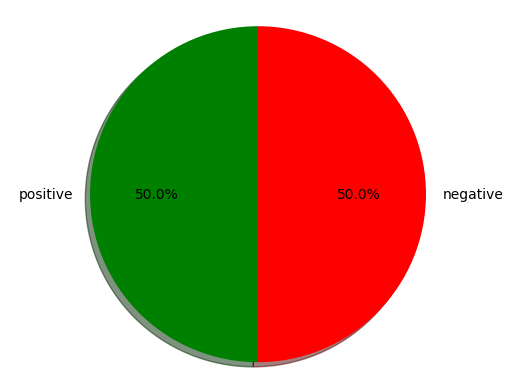

In [15]:
#Visualizing the categories
plt.pie([len(all_negative_tweets),len(all_positive_tweets)], labels=['positive','negative'], startangle=90, autopct='%1.1f%%', shadow=True, colors=['green', 'red'])
plt.axis('equal')

In [16]:
#Applying the processing on a tweet
final_tweet = processing_tweet(all_positive_tweets[0])

Tweet before the preprocessing:  #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Tweet after the cleaning:  FollowFriday for being top engaged members in my community this week
Tweet after Tokenization:  ['followfriday', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week']
Stop words are:  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'i